In [1]:
import tensorflow as tf
print(tf.__version__)


C:\Users\E\AppData\Roaming\Python\Python38\site-packages\requests\__init__.py:109: RequestsDependencyWarning: urllib3 (2.0.4) or chardet (None)/charset_normalizer (3.2.0) doesn't match a supported version!
  warnings.warn(


2.10.0


In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    for gpu in gpus:
        print("GPU Name:", gpu.name)
else:
    print("No GPUs detected.")


GPU Name: /physical_device:GPU:0


In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Read data
data = pd.read_csv("https://raw.githubusercontent.com/sreckojoksimovic/infs5100/main/wine-data.csv")
data['quality_class'] = data['quality_class'].astype('category')
data.head()


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality_class
0,7.3,0.65,0.00,1.2,0.065,15,21,0.9946,3.39,0.47,10.0,1
1,7.8,0.58,0.02,2.0,0.073,9,18,0.9968,3.36,0.57,9.5,1
2,8.5,0.28,0.56,1.8,0.092,35,103,0.9969,3.30,0.75,10.5,1
3,8.1,0.38,0.28,2.1,0.066,13,30,0.9968,3.23,0.73,9.7,1
4,7.5,0.52,0.16,1.9,0.085,12,35,0.9968,3.38,0.62,9.5,1


In [6]:
# Define numeric_vars as all columns except 'quality_class'
numeric_vars = [col for col in data.columns if col != 'quality_class']

# Preprocess data
X = data[numeric_vars].values
y = data['quality_class'].cat.codes.values

# Ensure that y is a 1D array with dtype float
y = y.astype(np.float32)

# Split data into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:

# Define Logistic Regression model
model = Sequential([
    Dense(1, activation='sigmoid', input_shape=(X_train.shape[1],))
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=1000, batch_size=32)  # Reduced batch size from 64 to 32

# Evaluate model on test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy}')


Epoch 1/1000
34/34 [==============================] - 2s 2ms/step - loss: 0.7283 - accuracy: 0.6233
Epoch 2/1000
34/34 [==============================] - 0s 2ms/step - loss: 0.7026 - accuracy: 0.6474
Epoch 3/1000
34/34 [==============================] - 0s 2ms/step - loss: 0.6794 - accuracy: 0.6567
Epoch 4/1000
34/34 [==============================] - 0s 2ms/step - loss: 0.6584 - accuracy: 0.6679
Epoch 5/1000
34/34 [==============================] - 0s 2ms/step - loss: 0.6393 - accuracy: 0.6884
Epoch 6/1000
34/34 [==============================] - 0s 2ms/step - loss: 0.6219 - accuracy: 0.7014
Epoch 7/1000
34/34 [==============================] - 0s 2ms/step - loss: 0.6055 - accuracy: 0.7126
Epoch 8/1000
34/34 [==============================] - 0s 2ms/step - loss: 0.5909 - accuracy: 0.7228
Epoch 9/1000
34/34 [==============================] - 0s 2ms/step - loss: 0.5770 - accuracy: 0.7293
Epoch 10/1000
34/34 [==============================] - 0s 2ms/step - loss: 0.5643 - accuracy: 0.7340

15/15 [==============================] - 0s 929us/step


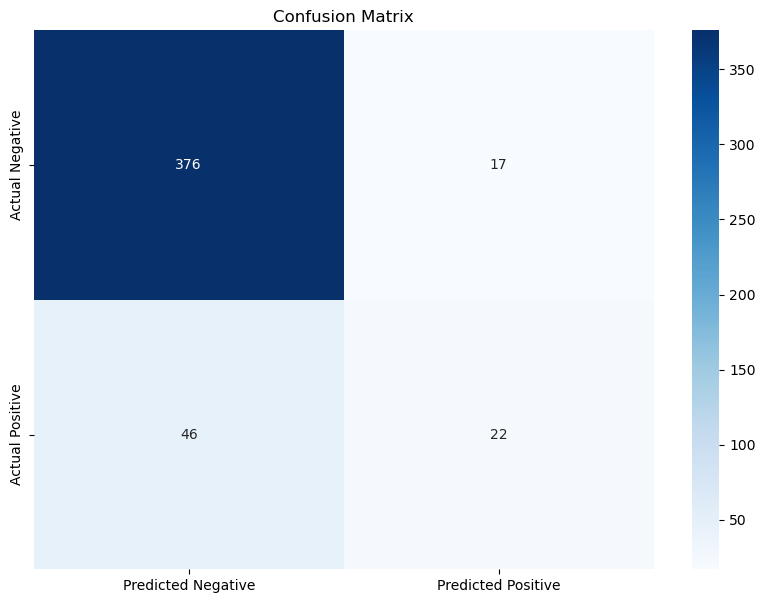

In [10]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Predict class labels for the test set
y_pred = (model.predict(X_test) > 0.5).astype('int32')

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Convert the confusion matrix to integer type
cm = cm.astype(int)

# Define a DataFrame for better labeling
cm_df = pd.DataFrame(cm, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])

# Plot the heatmap
plt.figure(figsize=(10,7))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='d') # Use 'fmt' argument to specify integer format
plt.title('Confusion Matrix')
plt.show()
